In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm 
from matplotlib import pyplot as plt
import seaborn as sns

## Check inductive edge bank metrics

In [2]:
data_name = 'uci'
def calculate_inductive_metric(data_name):
  node_feats = np.load(f'/home/ayush/DyGLib/processed_data/{data_name}/ml_{data_name}_node.npy')
  edge_feats = np.load(f'/home/ayush/DyGLib/processed_data/{data_name}/ml_{data_name}.npy')
  edge_data = pd.read_csv(f'/home/ayush/DyGLib/processed_data/{data_name}/ml_{data_name}.csv')

  num_nodes = node_feats.shape[0]
  node1 = torch.tensor(edge_data["u"].tolist())
  node2 = torch.tensor(edge_data["i"].tolist())
  ts = torch.tensor(edge_data["ts"].tolist())
  t_factor = 1
  pointer = 0
  min_time = ts[0]
  max_time = ts[-1]

  old_deg = torch.zeros(num_nodes)
  is_node_seen = torch.zeros(num_nodes, dtype = torch.bool)
  for max_cur_time_factor in torch.arange(0, 1/t_factor):
    while(ts[pointer] < min_time + (max_cur_time_factor+1)*t_factor*(max_time-min_time)):
      old_deg[node1[pointer]] += 1
      old_deg[node2[pointer]] += 1
      is_node_seen[node1[pointer]] = True
      is_node_seen[node2[pointer]] = True
      pointer += 1
    pointer2 = pointer
    is_node_seen2 = is_node_seen.copy()
    while(ts[pointer2] < min_time + (max_cur_time_factor+2)*t_factor*(max_time-min_time)):
      if is_node_seen2[node1[pointer2]]:
        neg_sample = torch.randint(0, num_nodes).item()
        pos_sample = node2
      else if is_node_seen2[node2[pointer2]]:
        
      
  count, deg = np.histogram(old_deg, bins = 10)
  count = torch.tensor(count)
  deg = torch.tensor(deg)[1:]
  sort_order = torch.argsort(count)
  # plt.stairs(count, deg)
  plt.plot(count[sort_order], deg[sort_order])
  plt.title(f'New Histogram for overall degree {data_name}')
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('degree')
  plt.ylabel('count')
  plt.show()
  plt.close()

SyntaxError: expected ':' (1312758744.py, line 31)

## Draw degree histogram

In [15]:
def draw_degree_hist(data_name):
  node_feats = np.load(f'/home/ayush/DyGLib/processed_data/{data_name}/ml_{data_name}_node.npy')
  edge_feats = np.load(f'/home/ayush/DyGLib/processed_data/{data_name}/ml_{data_name}.npy')
  edge_data = pd.read_csv(f'/home/ayush/DyGLib/processed_data/{data_name}/ml_{data_name}.csv')

  num_nodes = node_feats.shape[0]
  node1 = torch.tensor(edge_data["u"].tolist())
  node2 = torch.tensor(edge_data["i"].tolist())
  ts = torch.tensor(edge_data["ts"].tolist())
  t_factor = 1
  pointer = 0
  min_time = ts[0]
  max_time = ts[-1]

  old_deg = torch.zeros(num_nodes)
  is_node_seen = torch.zeros(num_nodes, dtype = torch.bool)
  for max_cur_time_factor in torch.arange(0, 1/t_factor):
    while(ts[pointer] < min_time + (max_cur_time_factor+1)*t_factor*(max_time-min_time)):
      old_deg[node1[pointer]] += 1
      old_deg[node2[pointer]] += 1
      is_node_seen[node1[pointer]] = True
      is_node_seen[node2[pointer]] = True
      pointer += 1
  count, deg = np.histogram(old_deg, bins = 15, range = (0, float(old_deg.max()//15)))
  count = torch.tensor(count)/count.sum()
  deg = torch.tensor(deg)[1:]
  sort_order = torch.argsort(deg)
  # plt.stairs(count, deg)
  return deg[sort_order], count[sort_order]

In [16]:
ALL_DATASETS = ["ia-slashdot-reply-dir", "ia-digg-reply", "ia-retweet-pol", "ia-escorts-dynamic", "ia-movielens-user2tags-10m", "ia-reality-call"]

In [17]:
# ALL_DATASETS = ["SocialEvo", "uci", "Flights", "CanParl", "USLegis", "UNtrade", "UNvote", "Contacts", "mooc", "wikipedia", "reddit", "enron", "myket"]
data = {}
for data_name in ALL_DATASETS:
  data[data_name] = draw_degree_hist(data_name)

In [18]:
data

{'ia-slashdot-reply-dir': (tensor([ 14.8667,  29.7333,  44.6000,  59.4667,  74.3333,  89.2000, 104.0667,
          118.9333, 133.8000, 148.6667, 163.5333, 178.4000, 193.2667, 208.1333,
          223.0000]),
  tensor([9.3106e-01, 3.5844e-02, 1.3111e-02, 6.9571e-03, 4.1547e-03, 2.6653e-03,
          1.7050e-03, 1.0975e-03, 8.8189e-04, 6.0752e-04, 5.2913e-04, 4.7034e-04,
          4.1155e-04, 3.1356e-04, 1.9597e-04])),
 'ia-digg-reply': (tensor([ 1.3333,  2.6667,  4.0000,  5.3333,  6.6667,  8.0000,  9.3333, 10.6667,
          12.0000, 13.3333, 14.6667, 16.0000, 17.3333, 18.6667, 20.0000]),
  tensor([0.4013, 0.1678, 0.1040, 0.1168, 0.0384, 0.0286, 0.0451, 0.0163, 0.0134,
          0.0223, 0.0092, 0.0073, 0.0136, 0.0060, 0.0099])),
 'ia-retweet-pol': (tensor([ 4.5333,  9.0667, 13.6000, 18.1333, 22.6667, 27.2000, 31.7333, 36.2667,
          40.8000, 45.3333, 49.8667, 54.4000, 58.9333, 63.4667, 68.0000]),
  tensor([0.8013, 0.0943, 0.0288, 0.0228, 0.0114, 0.0102, 0.0061, 0.0066, 0.0051,
      

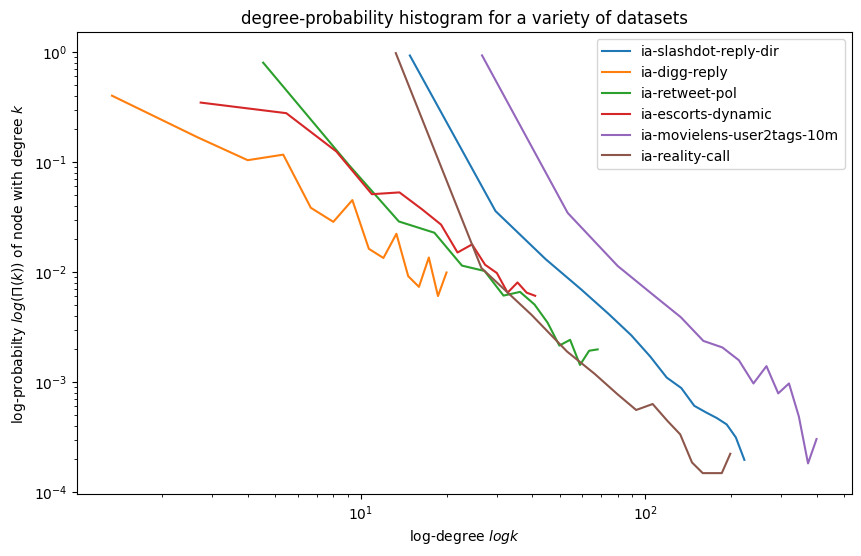

In [19]:
plt.figure(figsize=(10, 6))
for data_name, (deg, count) in data.items():  
  plt.plot(deg, count)
plt.title(f'degree-probability histogram for a variety of datasets')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'log-degree $log k$')
plt.ylabel(r'log-probabilty $log(\Pi(k))$ of node with degree $k$')
plt.legend(list(data.keys()))
plt.show()
plt.close()

In [80]:
def calculate_correlation(old_deg, new_node_new_deg):
  return float(torch.corrcoef(torch.cat((old_deg.unsqueeze(0), new_node_new_deg.unsqueeze(0)), dim = 0))[0, 1])

In [103]:
def calculate_all_correlations(node1, node2, ts, num_nodes, total_time, t1_factor = 0.05, t2_factor = 0.05):
  t1 = t1_factor * total_time
  t2 = t2_factor * total_time
  # indices corresponding to:
  p1 = 0  # start of the subgraph [t-t1-t2, t-t2)
  p2 = 0  # end of the subgraph [t-t1-t2, t-t2) and start of the subgraph [t-t2, t]
  p3 = 0  # end of the subgraph [t-t2, t]
  old_deg = torch.zeros(num_nodes)              # corresponds to the `degree` of each node in the subgraph [t-t1-t2, t-t2)
  new_node_new_deg = torch.zeros(num_nodes)     # corresponds to the `new node neighbor degree` of each node in the subgraph [t-t2, t]
  is_a_new_node = torch.ones(num_nodes, dtype=torch.bool)        # 1 if the node is unseen yet 0 otherwise
  is_a_new_node_edge = []   # stores is_a_new_node tuple for both the new nodes in [t-t2, t] subgraph
  correlations = []
  times = []
  is_first_time = True
  
  # Moving p3 from old timestamp to the next timestamp
  with tqdm(total=len(ts)) as pbar:
    while(p3 < len(ts)-1):
      if is_first_time:
        while(ts[p3] < t1 + t2):
          # Since this edge is entering the new subgraph [t-t2, t]
          # Add info to `is_a_new_node_edge` about whether the nodes are seen for the first time in this edge
          is_a_new_node_edge.append([is_a_new_node[node1[p3]], is_a_new_node[node2[p3]]])
          # If the nodes were unseen till now, then add 1 to the `new_node_new_deg` for the neighbour
          new_node_new_deg[node1[p3]] += int(is_a_new_node[node2[p3]])
          new_node_new_deg[node2[p3]] += int(is_a_new_node[node1[p3]])
          # Mark the nodes as seen
          is_a_new_node[node1[p3]] = False
          is_a_new_node[node2[p3]] = False
          # Move the counter ahead
          p3 += 1
          pbar.update(1)
        is_first_time = False
      else:
        # Since this edge is entering the new subgraph [t-t2, t]
        # Add info to `is_a_new_node_edge` about whether the nodes are seen for the first time in this edge
        is_a_new_node_edge.append([is_a_new_node[node1[p3]], is_a_new_node[node2[p3]]])
        # If the nodes were unseen till now, then add 1 to the `new_node_new_deg` for the neighbour
        new_node_new_deg[node1[p3]] += int(is_a_new_node[node2[p3]])
        new_node_new_deg[node2[p3]] += int(is_a_new_node[node1[p3]])
        # Mark the nodes as seen
        is_a_new_node[node1[p3]] = False
        is_a_new_node[node2[p3]] = False
        # Move the counter ahead
        p3 += 1
        pbar.update(1)
      
      while(ts[p2] < ts[p3]-t2):
        # Since this edge is going to the old subgraph [t-t1-t2, t-t2), add to the old_deg
        old_deg[node1[p2]] += 1
        old_deg[node2[p2]] += 1
        # Since this edge is coming from the new subgraph [t-t2, t]
        # If the other node was seen first at this edge (as indicated by the first element in `is_a_new_node_edge`, 
        # then remove 1 from the new_node_new_deg of this node)
        new_node_new_deg[node1[p2]] -= int(is_a_new_node_edge[0][1])
        new_node_new_deg[node2[p2]] -= int(is_a_new_node_edge[0][0])
        # Remove this edge from `is_a_new_node_edge` since it is no longer in the new subhraph [t-t2, t]
        is_a_new_node_edge = is_a_new_node_edge[1:]
        # Move the counter ahead
        p2 += 1
        
      while(ts[p1] < ts[p3]-t1-t2):
        # Since these edges are being removed from the old subgraph [t-t1-t2, t-t2), decrease old subgraph degree
        old_deg[node1[p1]] -= 1
        old_deg[node2[p1]] -= 1
        # Move the counter ahead
        p1 += 1
      
      correlations.append(calculate_correlation(old_deg, new_node_new_deg))
      times.append(ts[p3])
    return times, correlations

In [104]:
def calculate_correlation_plots(data_name = "wikipedia"):
  node_feats = np.load(f'/home/ayush/DyGLib/DG_data/{data_name}/ml_{data_name}_node.npy')
  num_nodes = node_feats.shape[0]
  edge_data = pd.read_csv(f'/home/ayush/DyGLib/DG_data/{data_name}/ml_{data_name}.csv')
  node1 = torch.tensor(edge_data["u"].tolist())
  node2 = torch.tensor(edge_data["i"].tolist())
  ts = torch.tensor(edge_data["ts"].tolist())
  
  # Check if they are sorted based on time
  new_ts = ts.clone().tolist()
  new_ts = sorted(new_ts)
  assert np.count_nonzero(np.array([new_ts[i] == ts[i] for i in range(len(ts))])) == len(ts)
  
  # Check if num_nodes is correct
  assert num_nodes == max(max(node1), max(node2)) + 1

  total_time = ts[-1] - ts[0]
  times, correlations = calculate_all_correlations(node1=node1, node2=node2, ts=ts, num_nodes=num_nodes, total_time=total_time, t1_factor = 0.05, t2_factor = 0.05)
  plt.plot(torch.arange(0, len(correlations)), correlations)
  plt.title(f'Correlation b/w old degree and new node neighbor degree for {data_name}')
  plt.show()

100%|█████████▉| 157473/157474 [00:37<00:00, 4228.98it/s]


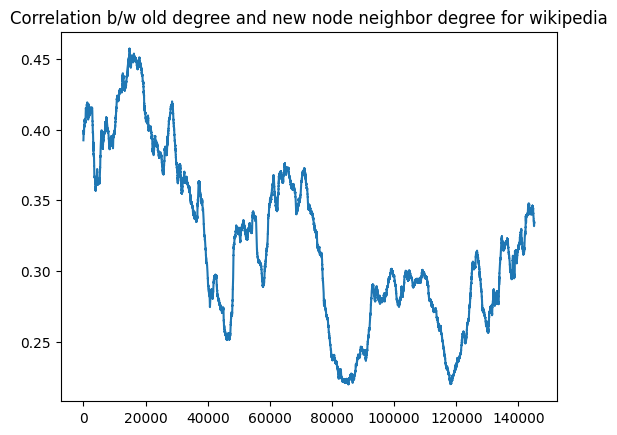

In [105]:
calculate_correlation_plots("wikipedia")

100%|█████████▉| 672446/672447 [03:22<00:00, 3320.33it/s]


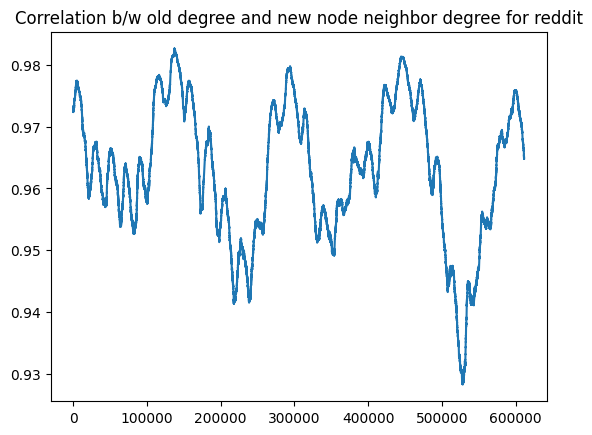

In [106]:
calculate_correlation_plots("reddit")